In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# 显示中文
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

### 1.生成数据集

In [2]:
def creatDataset():
    group = np.array([[0.5,3], [0.5,4], [0.5,6], [2,1.2], [2.5,4], [4,5], [3,6.5], [5,7], [4,3], [4.5,3.5], [7,6]])
    labels = ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
    
    return group, labels

In [3]:
# 样本数据
group, labels = creatDataset()

In [4]:
group

array([[0.5, 3. ],
       [0.5, 4. ],
       [0.5, 6. ],
       [2. , 1.2],
       [2.5, 4. ],
       [4. , 5. ],
       [3. , 6.5],
       [5. , 7. ],
       [4. , 3. ],
       [4.5, 3.5],
       [7. , 6. ]])

In [5]:
labels

['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']

In [6]:
# 测试样本数据
pre_data = [3.5,3]

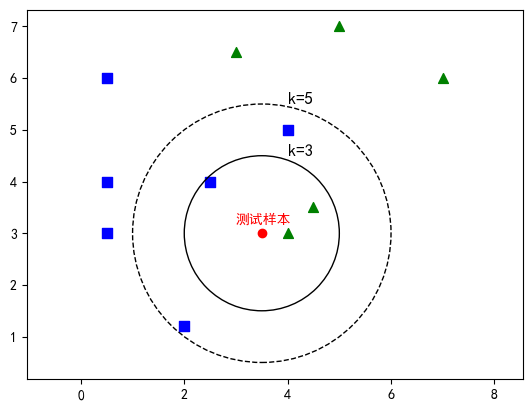

In [7]:
fig, ax = plt.subplots()

for i in range(len(labels)):
    if labels[i] == "A":
        ax.scatter(group[i,0], group[i,1],marker="s",color="blue",s=50)
    else:
        ax.scatter(group[i,0], group[i,1],marker="^",color="green",s=50)
ax.scatter(pre_data[0], pre_data[1],marker="o",color="red")

ax.set_xlim(0,8)
ax.set_ylim(0,8)
ax.text(3, 3.2, "测试样本",fontsize=10, color='r')
ax.text(4, 4.5, "k=3",fontsize=12)
ax.text(4, 5.5, "k=5",fontsize=12)

# 绘制不同k值下的示意圆
cir1 = Circle(xy = (pre_data[0], pre_data[1]), radius=1.5, facecolor="none" , edgecolor="k")
ax.add_patch(cir1)
cir2 = Circle(xy = (pre_data[0], pre_data[1]), radius=2.5, facecolor="none" , edgecolor="k",linestyle="--")
ax.add_patch(cir2)
plt.axis('scaled')
plt.axis('equal')

plt.show()

### 2.K-近邻算法实现

In [8]:
def classify(pre_data, sam_datas, sam_labels, k):
    """
    K-近邻算法实现
    Parameters，参数说明:
    pre_data - 测试集数据
    sam_datas - 训练集样本数据集
    sam_labels - 训练集样本标签
    k - kNN算法参数
    """
    # 计算距离,这里为欧氏距离(相减后再平方再求和再开方)
    diffMat = pre_data - sam_datas
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    
    # 返回distances中元素从小到大排序后的索引值
    sortedDistIndicies = distances.argsort()
    
    classCount = {}
    for i in range(k):
        # 根据排序后的索引值 获取 对应的样本数据标签
        vote_label = sam_labels[sortedDistIndicies[i]]
        # 使用get方法，计算每个标签的数量
        classCount[vote_label] = classCount.get(vote_label, 0) + 1
    # 使用sorted函数的key参数实现字典的降序排列
    sortedClassCount = sorted(classCount.items(), key=lambda x: x[1], reverse=True)
    
    # 返回次数最多的类别,即所要分类的类别
    return sortedClassCount[0][0]

### 3.预测结果

In [9]:
# k = 3 时预测结果
classify(pre_data, group, labels, 3)

'B'

In [10]:
# k = 5 时预测结果
classify(pre_data, group, labels, 5)

'A'